## Séries Temporais

### Complete guide to Time Series Forecasting (with Codes in Python)
- https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

### How to Check if Time Series Data is Stationary with Python
- https://machinelearningmastery.com/time-series-data-stationary-python/

### How to Create an ARIMA Model for Time Series Forecasting in Python
- https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

### Time Series Forecasting - ARIMA models - Towards Data Science
- https://towardsdatascience.com/time-series-forecasting-arima-models-7f221e9eee06

### ARIMA Model – Complete Guide to Time Series Forecasting in Python
- https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

In [1]:
# importar pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
#import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [3]:
# carregar arquivo de dados de treino
data = pd.read_csv('weather-train.csv', index_col='date', parse_dates=['date'])

#print("Data Types:\n", data.dtypes)
#print("\nIndex:\n", data.index)

data.head()

Data Types:
 temperature    float64
dtype: object

Index:
 DatetimeIndex(['2012-10-01', '2012-10-02', '2012-10-03', '2012-10-04',
               '2012-10-05', '2012-10-06', '2012-10-07', '2012-10-08',
               '2012-10-09', '2012-10-10',
               ...
               '2016-11-07', '2016-11-08', '2016-11-09', '2016-11-10',
               '2016-11-11', '2016-11-12', '2016-11-13', '2016-11-14',
               '2016-11-15', '2016-11-16'],
              dtype='datetime64[ns]', name='date', length=1508, freq=None)


,temperature
date,
2012-10-01,11.036840
2012-10-02,14.340558
2012-10-03,14.518382
2012-10-04,16.820351
2012-10-05,16.948431


In [4]:
data = data.dropna()

data = data.resample('7D').mean()
#data = data.resample('15D').mean()
#data = data.resample('M').mean()

#data = data['2015-01':'2015-12']
#data = data['2013-01':'2014-12']
#data = data['2013-01':'2015-12']

data['temperature'] += 273.15

data.head()

,temperature
date,
2012-10-01,286.624154
2012-10-08,280.282641
2012-10-15,285.268254
2012-10-22,286.010448
2012-10-29,278.265557


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 216 entries, 2012-10-01 to 2016-11-14
Data columns (total 1 columns):
temperature    216 non-null float64
dtypes: float64(1)
memory usage: 3.4 KB


In [6]:
data.describe()

,temperature
count,216.000000
mean,285.830010
std,10.969908
min,260.033010
25%,277.275119
50%,287.076738
75%,295.180320
max,306.179648


In [7]:
ts = data['temperature']

ts.head()

date
2012-10-01    286.624154
2012-10-08    280.282641
2012-10-15    285.268254
2012-10-22    286.010448
2012-10-29    278.265557
Name: temperature, dtype: float64

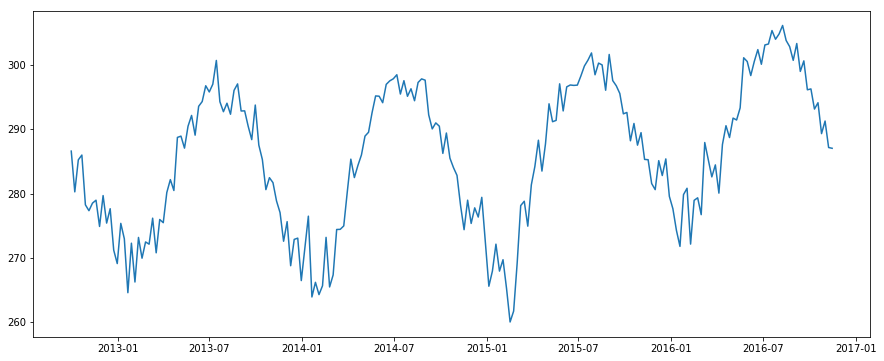

In [8]:
plt.plot(ts)

In [9]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts.values)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.262713
p-value: 0.000007


In [10]:
df = ts.to_frame()

In [11]:
from pmdarima.arima.utils import ndiffs

y = ts

## Adf Test
print('adf:', ndiffs(y, test='adf')) # 2

# KPSS test
print('kpss:', ndiffs(y, test='kpss')) # 0

# PP test:
print('pp:', ndiffs(y, test='pp')) # 2

adf: 1
kpss: 1
pp: 1


## Eliminating Trend and Seasonality

### Differencing

### Decomposing

## Forecasting a Time Series

In [12]:
pd.DataFrame({'orig': ts, 'diff': ts.diff(), 'diff7': ts.diff(7),
              '2diff': ts.diff().diff(), '3diff': ts.diff().diff().diff()}).tail(10)

,orig,diff,diff7,2diff,3diff
date,,,,,
2016-09-12,299.030253,-4.338635,-5.002767,-6.955592,-11.700671
2016-09-19,300.667537,1.637284,-4.185932,5.975919,12.931511
2016-09-26,296.168949,-4.498588,-10.010699,-6.135871,-12.111790
2016-10-03,296.304603,0.135654,-7.538335,4.634241,10.770113
2016-10-10,293.168801,-3.135802,-9.711253,-3.271456,-7.905697
2016-10-17,294.153770,0.984970,-6.598161,4.120771,7.392227
2016-10-24,289.346348,-4.807423,-14.022540,-5.792392,-9.913163
2016-10-31,291.307098,1.960751,-7.723154,6.768173,12.560565
2016-11-07,287.185468,-4.121630,-13.482069,-6.082381,-12.850554


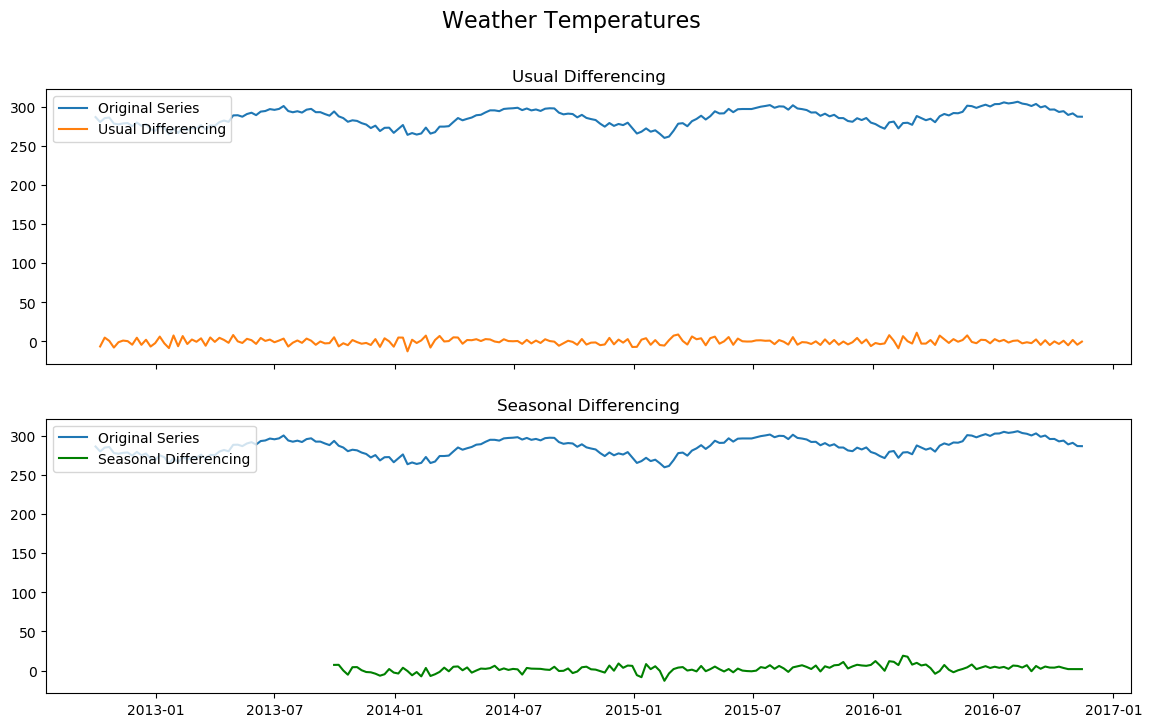

In [13]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(14,8), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(ts, label='Original Series')
axes[0].plot(ts.diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)

# Seasinal Dei
seasonal = 52 #24 # 365 dias / período
axes[1].plot(ts, label='Original Series')
axes[1].plot(ts.diff(seasonal), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Weather Temperatures', fontsize=16)
plt.show()

In [14]:
# Create Training and Test
corte = int(len(ts) * 0.7)
train = ts[:corte].dropna()
test = ts[corte:].dropna()
print(train.shape, test.shape)

(151,) (65,)


In [15]:
train.index

DatetimeIndex(['2012-10-01', '2012-10-08', '2012-10-15', '2012-10-22',
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-03',
               ...
               '2015-06-15', '2015-06-22', '2015-06-29', '2015-07-06',
               '2015-07-13', '2015-07-20', '2015-07-27', '2015-08-03',
               '2015-08-10', '2015-08-17'],
              dtype='datetime64[ns]', name='date', length=151, freq='W-MON')

In [16]:
from pmdarima import auto_arima

# Seasonal - fit stepwise auto-ARIMA
seasonal = 52 #24 # 365 dias / período
smodel = auto_arima(ts, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=seasonal,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=False, 
                         stepwise=True)

smodel.summary()

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds


/dados/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 52); AIC=960.568, BIC=966.768, Fit time=0.360 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 52); AIC=914.211, BIC=926.610, Fit time=6.569 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 1, 0, 52); AIC=930.633, BIC=939.933, Fit time=0.398 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 1, 0, 52); AIC=898.959, BIC=914.458, Fit time=18.619 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 1, 1, 52); AIC=909.661, BIC=928.260, Fit time=50.455 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(2, 1, 0, 52); AIC=904.998, BIC=917.397, Fit time=14.591 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(2, 1, 0, 52); AIC=899.676, BIC=918.275, Fit time=23.910 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(2, 1, 0, 52); AIC=896.916, BIC=915.515, Fit time=29.486 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(2, 1, 0,

/dados/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 0, 1) seasonal_order=(2, 1, 1, 52); AIC=899.967, BIC=921.666, Fit time=69.795 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(2, 1, 0, 52); AIC=900.599, BIC=916.098, Fit time=17.782 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(2, 1, 0, 52); AIC=898.246, BIC=919.945, Fit time=36.728 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(2, 1, 0, 52); AIC=898.156, BIC=919.855, Fit time=36.017 seconds
Total fit time: 314.710 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  216
Model:             SARIMAX(1, 0, 1)x(2, 1, 0, 52)   Log Likelihood                -442.458
Date:                            Wed, 28 Aug 2019   AIC                            896.916
Time:                                    10:15:08   BIC                            915.515
Sample:                                         0   HQIC                           904.467
                                            - 216                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7155      0.508      1.409      0.159      -0.280       1.711
ar.L1          0.8671      0.083     10.393      0.000       0.704       1.031
ma.L1         -0.6828      0.118     -5.780      0.000      -0.914      -0.451
ar.S.L52      -0.5659      0.086     -6.601      0.000      -0.734      -0.398
ar.S.L104     -0.4460      0.108     -4.147      0.000      -0.657      -0.235
sigma2        10.6284      1.625      6.539      0.000       7.443      13.814
===================================================================================
Ljung-Box (Q):                       36.16   Jarque-Bera (JB):                 8.89
Prob(Q):                              0.64   Prob(JB):                         0.01
Heteroskedasticity (H):               1.12   Skew:                            -0.50
Prob(H) (two-sided):                  0.67   Kurtosis:                         3.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

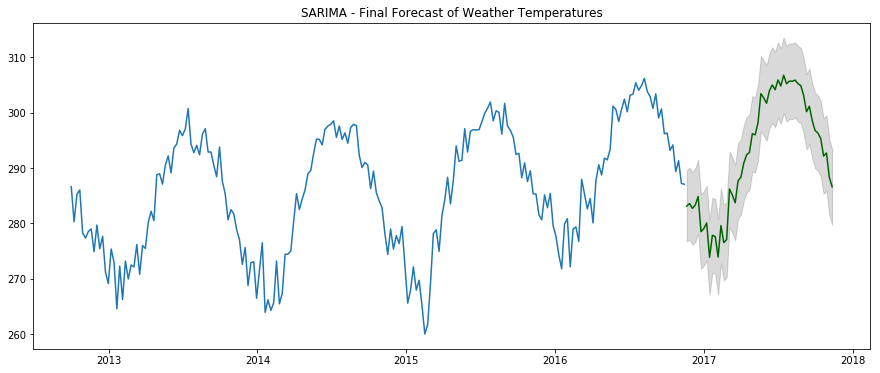

In [18]:
# Forecast
n_periods = 52 #24 #12 # 1 ano
freq = 'W' #'15D' #'M' # mês
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq=freq)

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Weather Temperatures")
plt.show()